In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df_raw=pd.read_csv("diabetes.csv")
df_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df_raw.shape

(768, 9)

In [10]:
df_raw.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [27]:
df_copy=df_raw.copy(deep=True)

In [28]:
df_copy[['Glucose','BloodPressure',
         'SkinThickness','Insulin','BMI']]=df_copy[['Glucose','BloodPressure',
                                                                            'SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [29]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

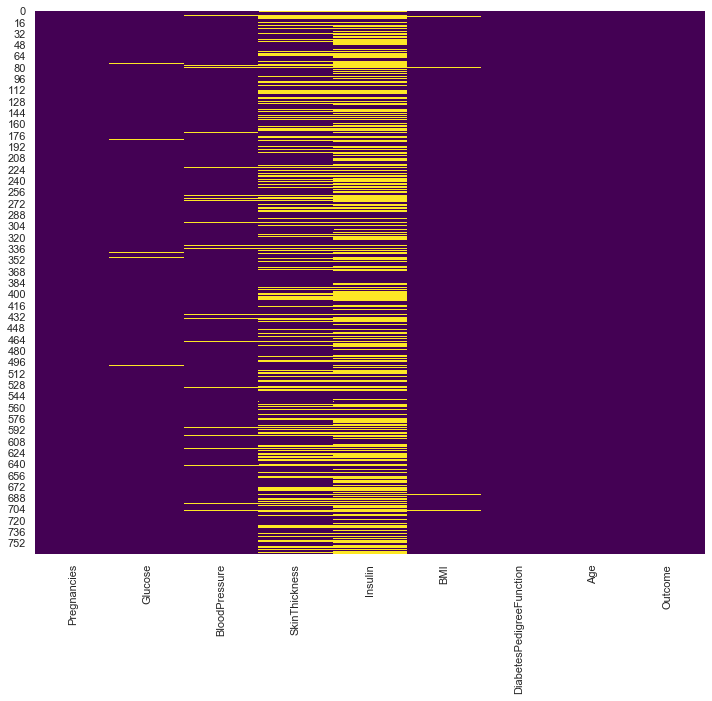

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(df_copy.isnull(),cbar=False,cmap='viridis')

#### Checking Data-distribution

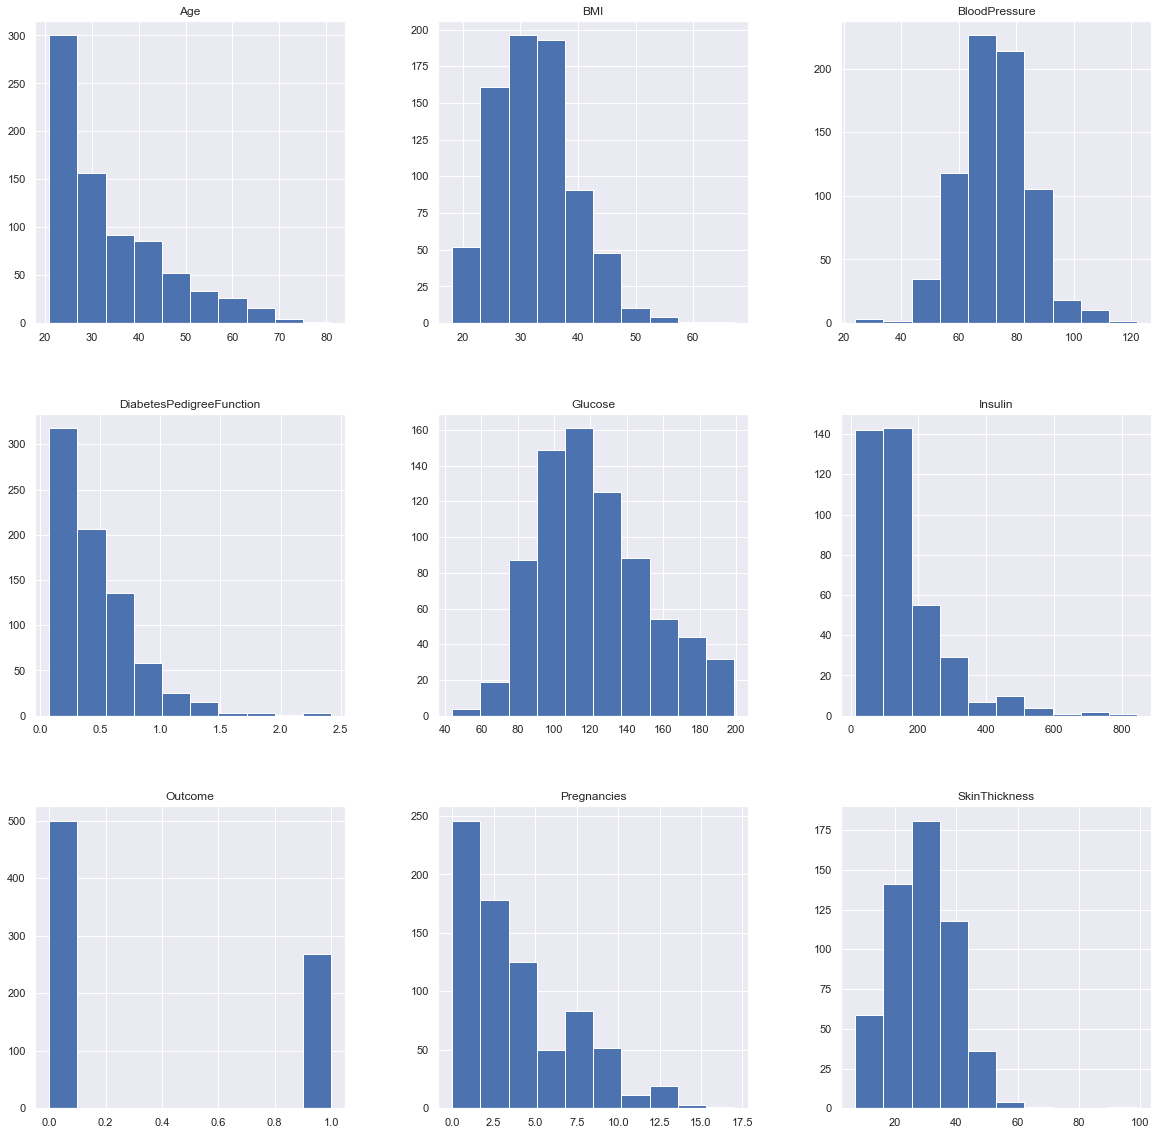

In [31]:
plot=df_copy.hist(figsize=(20,20))

In [33]:
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)

df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)

df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)

df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)

df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Checking distribution after imputing Nan values

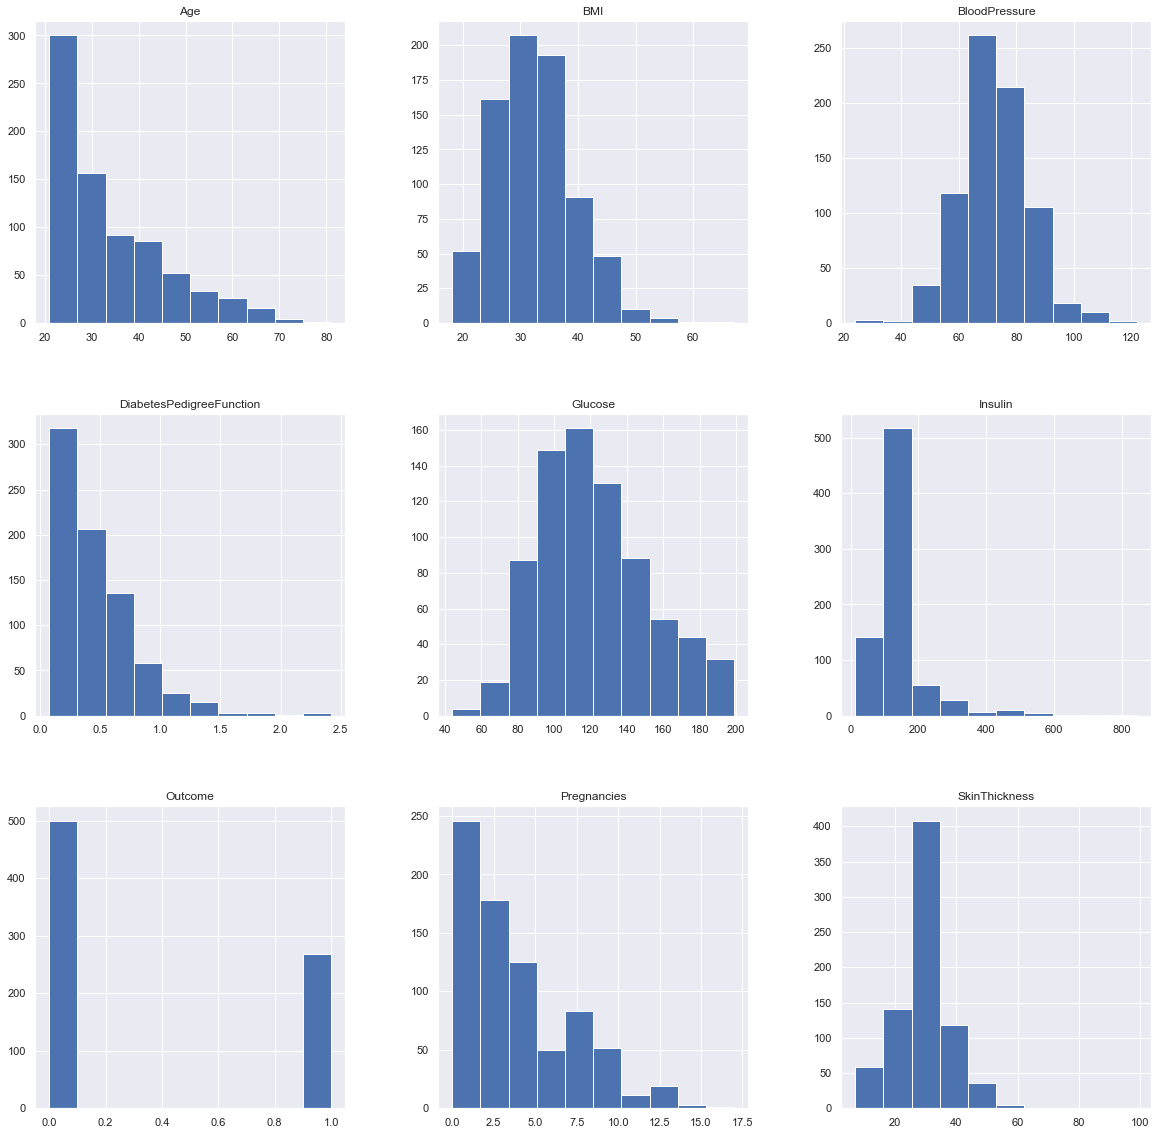

In [35]:
plot2=df_copy.hist(figsize=(20,20))

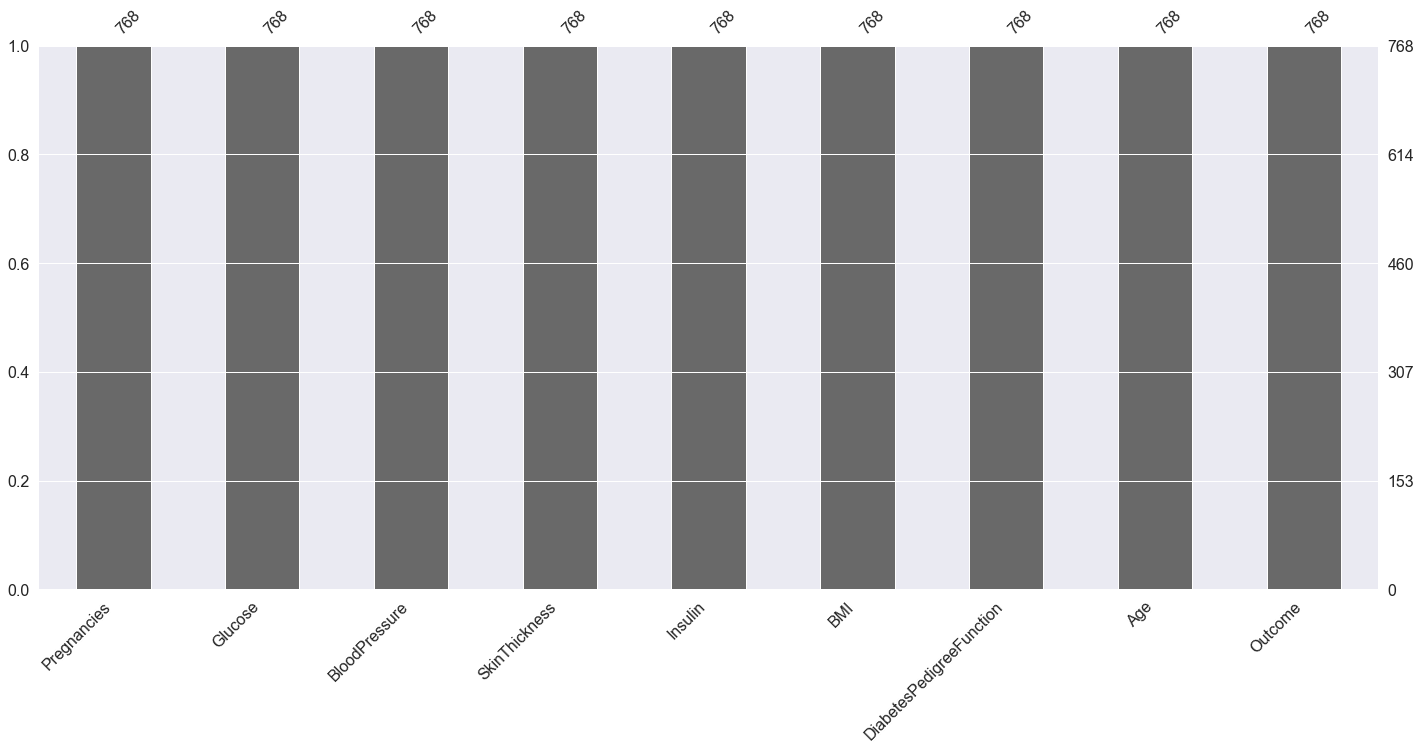

In [38]:
import missingno as msno
plot=msno.bar(df_raw)

0    500
1    268
Name: Outcome, dtype: int64


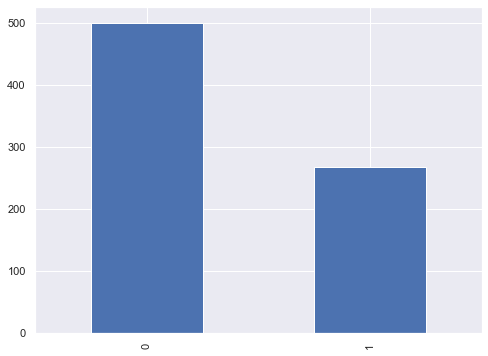

In [42]:
print(df_raw.Outcome.value_counts())
df_raw.Outcome.value_counts().plot.bar(figsize=(8,6))

#### The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

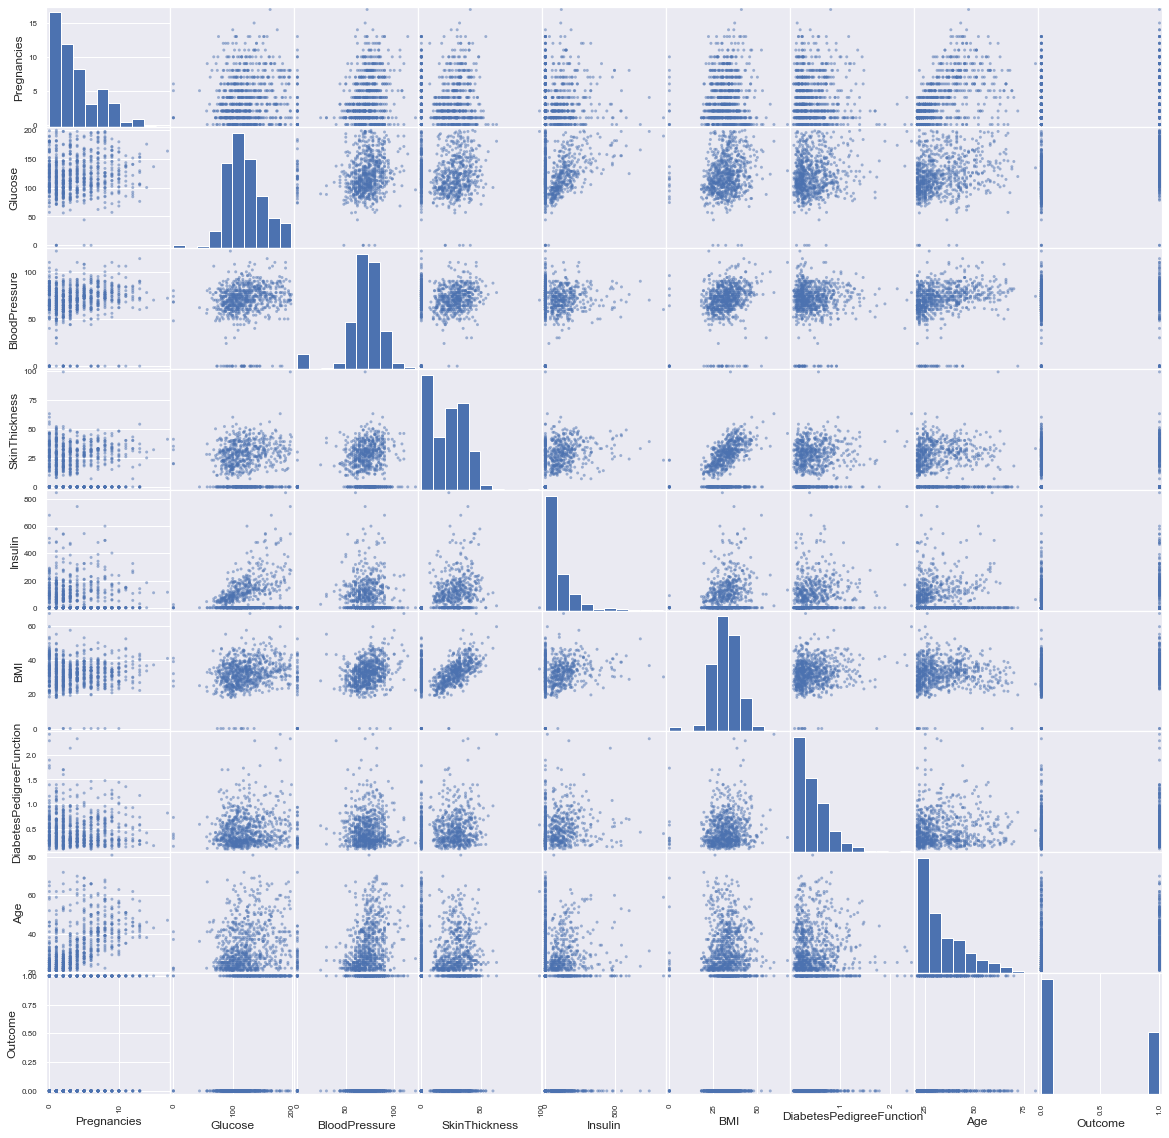

In [47]:
from pandas.plotting import scatter_matrix
plot=scatter_matrix(df_raw,figsize=(20,20))

#### Pairplot for clean data

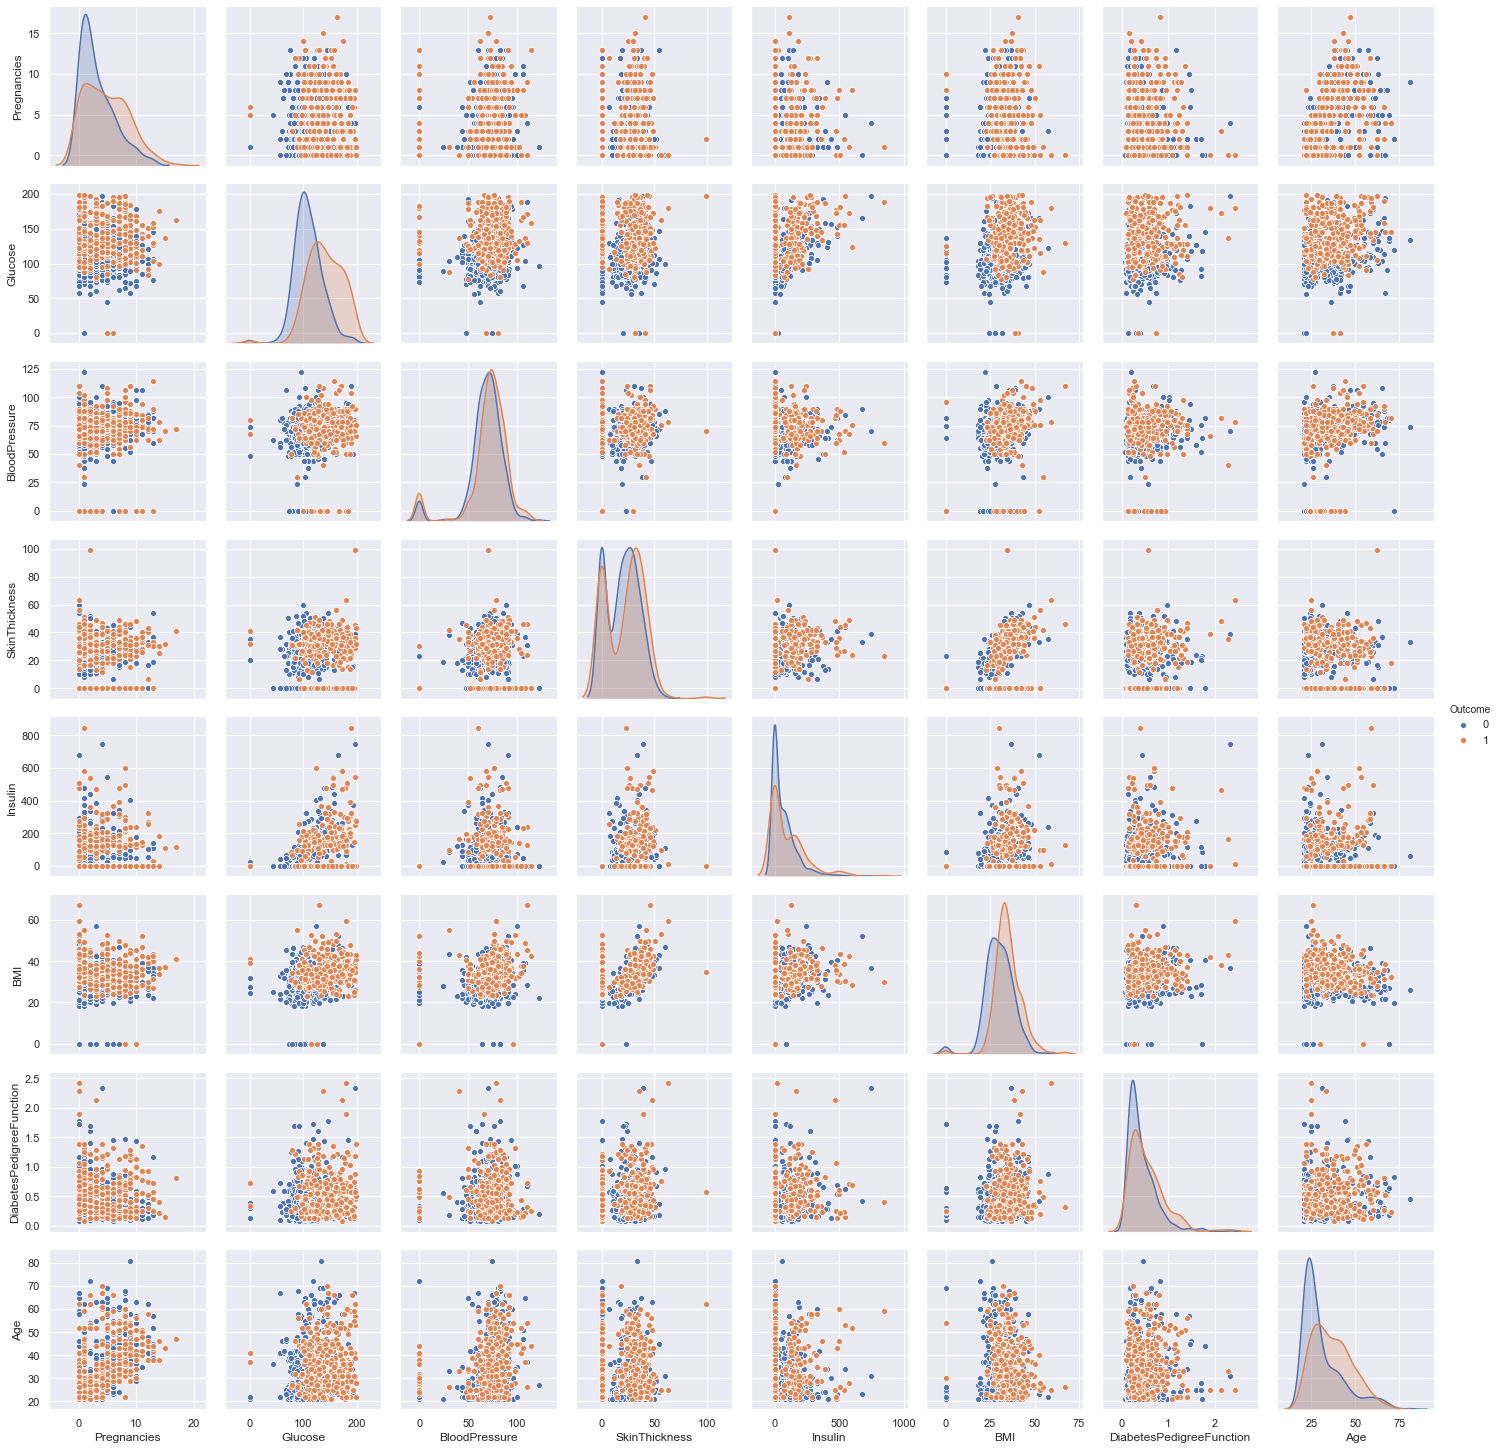

In [48]:
sns.pairplot(df_copy,hue='Outcome')

#### Heatmap for unclean data

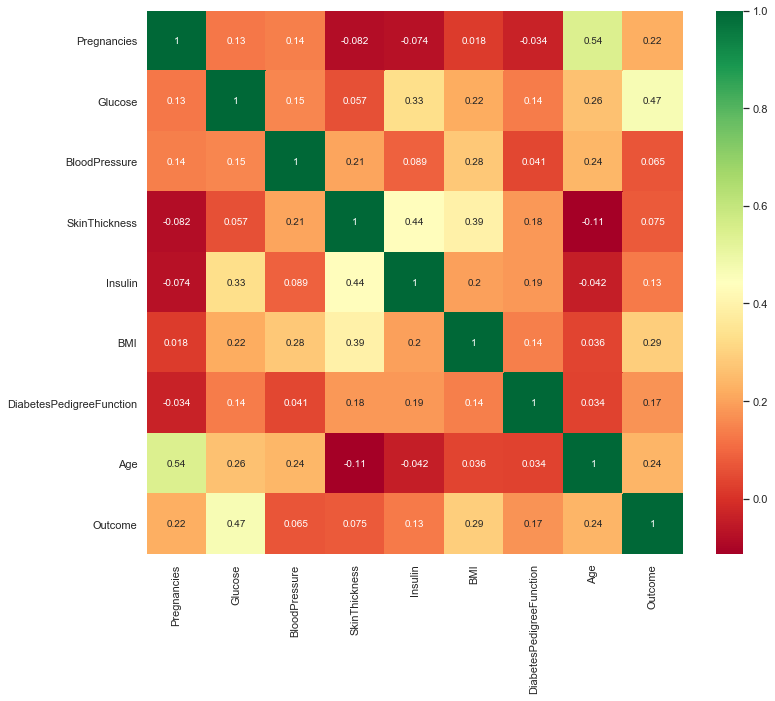

In [49]:
plt.figure(figsize=(12,10)) 
sns.heatmap(df_raw.corr(),annot=True,cmap ='RdYlGn')

#### Heatmap for clean data

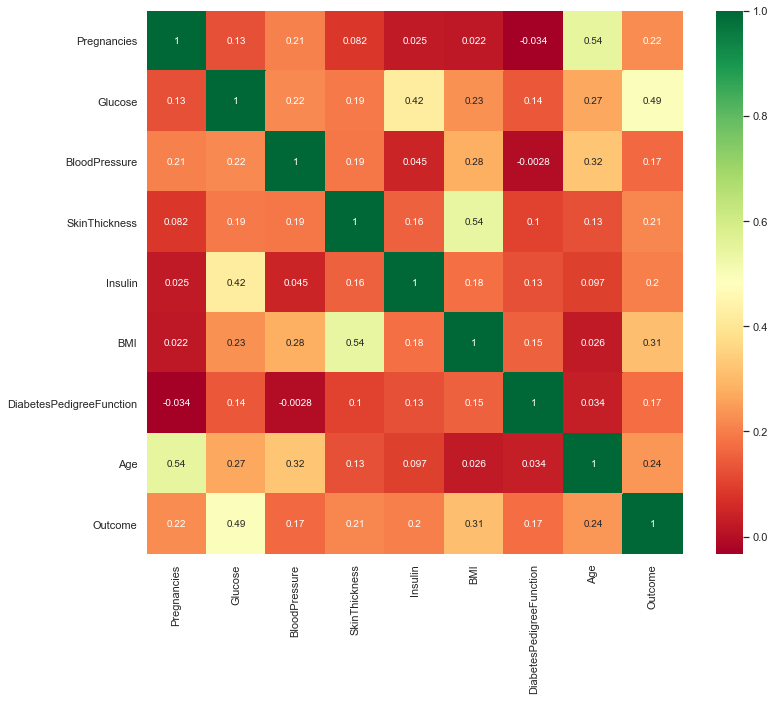

In [50]:
plt.figure(figsize=(12,10)) 
sns.heatmap(df_copy.corr(),annot=True,cmap ='RdYlGn')

In [51]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [58]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=pd.DataFrame(sc_X.fit_transform(df_copy.drop(['Outcome'],axis=1)))
X.columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [59]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,df_copy.Outcome,train_size=0.7,random_state=40)

In [80]:
from sklearn.neighbors import KNeighborsClassifier

train_score=[]
test_score=[]

for i in range(1,16):
        knn=KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        
        train_score.append(knn.score(X_train,y_train))
        test_score.append(knn.score(X_test,y_test))

In [81]:
print(train_score)
print(test_score)

[1.0, 0.8491620111731844, 0.8621973929236499, 0.819366852886406, 0.8268156424581006, 0.8100558659217877, 0.813780260707635, 0.8100558659217877, 0.8119180633147114, 0.8044692737430168, 0.8081936685288641, 0.8026070763500931, 0.8044692737430168, 0.7932960893854749, 0.8007448789571695]
[0.658008658008658, 0.658008658008658, 0.7142857142857143, 0.7359307359307359, 0.7489177489177489, 0.7489177489177489, 0.7619047619047619, 0.7359307359307359, 0.7359307359307359, 0.7229437229437229, 0.7359307359307359, 0.7316017316017316, 0.7489177489177489, 0.7272727272727273, 0.7402597402597403]


In [82]:
max_train_score=max(train_score)
max_test_score=max(test_score)

print("Max Training Score is {}".format(max_train_score))
print("Max Testing Score is {}".format(max_test_score))

Max Training Score is 1.0
Max Testing Score is 0.7619047619047619


In [83]:
train_score_index=[i for i,k in enumerate(train_score) if k==max_train_score]
print(train_score_index)

[0]


In [84]:
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_score_index))))

Max train score 100.0 % and k = [1]


In [85]:
test_score_index = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_score_index))))

Max test score 76.19047619047619 % and k = [7]


#### Visualising Results

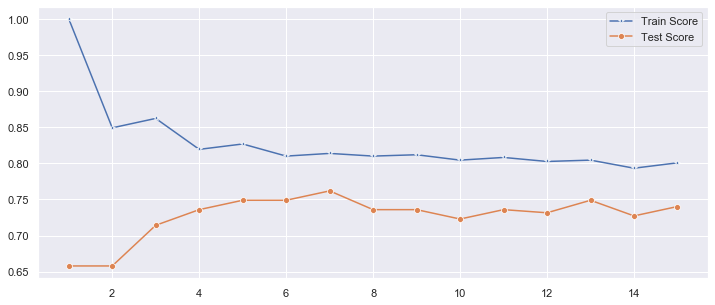

In [87]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,16),train_score,marker='*',label='Train Score')
p = sns.lineplot(range(1,16),test_score,marker='o',label='Test Score')

In [90]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(7)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7619047619047619

In [92]:
y_pred=knn.predict(X_test)

In [93]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,y_test))

[[122  35]
 [ 20  54]]


Text(0.5, 12.5, 'Predicted label')

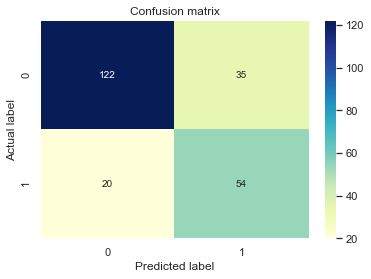

In [112]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

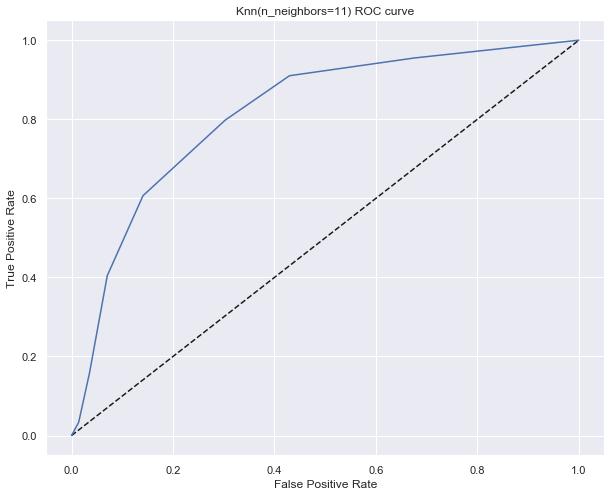

In [107]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [108]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8162683968982434

In [110]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,df_copy.Outcome)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}
